**Pavan Pyla**
 # Fraud Provider Detection In Health Care using several Classification Tecniques

## Importing the Data Imbalance Learning Tolls

In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

### Reading the data into Data Frame

In [3]:
Train=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [4]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [5]:
Train_Beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [6]:
Train_Inpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Train_Outpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### OutPatient ,Inpatient and Beneficiary

In [8]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [9]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

## Data Preprocessing

In [10]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE158968,CLM36721,2009-02-02,2009-02-07,PRV56335,8000,PHY346834,PHY376714,NaN,4552,...,1,2,2,2,2,2,9500,1568,0,0
558207,BENE158970,CLM44251,2009-03-26,2009-03-31,PRV52019,7000,PHY337065,NaN,NaN,25080,...,2,1,1,1,2,1,7000,1068,1290,740
558208,BENE159064,CLM72015,2009-10-14,2009-10-23,PRV52135,22000,PHY315112,NaN,NaN,V5789,...,2,1,2,2,2,2,22000,1068,0,0
558209,BENE159103,CLM58155,2009-07-02,2009-07-04,PRV53923,4000,PHY420889,PHY428043,NaN,4580,...,1,2,1,1,2,2,4000,1068,0,0


In [11]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

In [12]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,...,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,...,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,...,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,...,1,1,2,2,2,5000,1068,0,0,No


In [13]:
df=df.drop(['BeneID','ClaimID'],axis=1)

In [14]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,...,1,1,2,2,2,5000,1068,0,0,No


In [15]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [16]:
df=df.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [17]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,DeductibleAmtPaid,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,0.0,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,1068.0,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,1068.0,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,1068.0,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,1068.0,...,1,1,2,2,2,5000,1068,0,0,No


In [18]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [19]:
data=df

In [20]:
df = pd.DataFrame()
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [21]:

startdate= pd.to_datetime( data["AdmissionDt"] )
enddate= pd.to_datetime( data["DischargeDt"] )

pe = ( enddate - startdate).dt.days
df["Hperiod"] = pe

In [22]:
df['claim']=data['InscClaimAmtReimbursed']

In [23]:
startdate= pd.to_datetime( data["ClaimStartDt"] )
enddate= pd.to_datetime( data["ClaimEndDt"] )

p = ( enddate - startdate).dt.days
df["period"] = p

In [24]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=data.apply(physician_same,axis=1)

In [25]:
df['phy_same']=phy_same

In [26]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

data['PotentialFraud']= label_encoder.fit_transform(data['PotentialFraud'])
  
data['PotentialFraud'].unique()

array([1, 0])

In [27]:
data['PotentialFraud'].sum()       ## The target variable is balanced in both categories

212796

In [28]:
data['Gender']

0         2
1         1
2         1
3         1
4         1
         ..
558206    2
558207    1
558208    1
558209    2
558210    2
Name: Gender, Length: 558211, dtype: int64

In [29]:
df

,Hperiod,claim,period,phy_same
0,NaN,30,0,3
1,NaN,40,0,3
2,NaN,200,0,3
3,NaN,20,0,3
4,NaN,40,0,3
...,...,...,...,...
558206,5.0,0,5,3
558207,3.0,4000,3,3
558208,8.0,8000,8,3
558209,3.0,5000,3,3


In [30]:
from sklearn.preprocessing import OneHotEncoder     # One Hot Encoding 
                                                        

In [31]:
encoder = OneHotEncoder()


one_hot = encoder.fit_transform(data[['Gender']]).toarray()

# create a new DataFrame with the encoded data
df = pd.concat([df, pd.DataFrame(one_hot, columns=encoder.get_feature_names())], axis=1)

# display the encoded DataFrame
print(df)

        Hperiod  claim  period  phy_same  x0_1  x0_2
0           NaN     30       0         3   0.0   1.0
1           NaN     40       0         3   1.0   0.0
2           NaN    200       0         3   1.0   0.0
3           NaN     20       0         3   1.0   0.0
4           NaN     40       0         3   1.0   0.0
...         ...    ...     ...       ...   ...   ...
558206      5.0      0       5         3   0.0   1.0
558207      3.0   4000       3         3   1.0   0.0
558208      8.0   8000       8         3   1.0   0.0
558209      3.0   5000       3         3   0.0   1.0
558210      8.0   3000       8         3   0.0   1.0

[558211 rows x 6 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
from sklearn.preprocessing import StandardScaler


In [33]:

scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['claim']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)




           claim  Hperiod  period  phy_same  x0_1  x0_2
0      -0.253043      NaN       0         3   0.0   1.0
1      -0.250426      NaN       0         3   1.0   0.0
2      -0.208558      NaN       0         3   1.0   0.0
3      -0.255660      NaN       0         3   1.0   0.0
4      -0.250426      NaN       0         3   1.0   0.0
...          ...      ...     ...       ...   ...   ...
558206 -0.260893      5.0       5         3   0.0   1.0
558207  0.785807      3.0       3         3   1.0   0.0
558208  1.832508      8.0       8         3   1.0   0.0
558209  1.047483      3.0       3         3   0.0   1.0
558210  0.524132      8.0       8         3   0.0   1.0

[558211 rows x 6 columns]


In [34]:
# df["Gender"]=data["Gender"].replace({2:0})

In [35]:
df

,claim,Hperiod,period,phy_same,x0_1,x0_2
0,-0.253043,NaN,0,3,0.0,1.0
1,-0.250426,NaN,0,3,1.0,0.0
2,-0.208558,NaN,0,3,1.0,0.0
3,-0.255660,NaN,0,3,1.0,0.0
4,-0.250426,NaN,0,3,1.0,0.0
...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0
558207,0.785807,3.0,3,3,1.0,0.0
558208,1.832508,8.0,8,3,1.0,0.0
558209,1.047483,3.0,3,3,0.0,1.0


In [36]:
df["RenalDiseaseIndicator"]=data["RenalDiseaseIndicator"].replace({"Y":1})

In [37]:
birthdate=pd.to_datetime(data["DOB"])
enddate=pd.to_datetime(data["DOD"])

# cheack whether the patient dead or alive
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alive = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

df["age"]=period
df["alife"]=alive

In [38]:
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [39]:
from pandas.api.types import is_numeric_dtype

In [40]:
for i in df.columns:
  print(f"{i }:",is_numeric_dtype(df
[i]))

claim: True
Hperiod: True
period: True
phy_same: True
x0_1: True
x0_2: True
RenalDiseaseIndicator: False
age: True
alife: True


In [41]:
columns=['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer',
         'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
         'ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid','PotentialFraud']

In [42]:
df['Provider']= label_encoder.fit_transform(data['Provider'])
  
df['Provider'].unique()

array([4004, 5280, 5269, ..., 2810,  185, 2016])

In [43]:
for i in columns:
    df[i]=data[i]

In [44]:
df['Provider']=df['Provider']

In [45]:
df.columns

Index(['claim', 'Hperiod', 'period', 'phy_same', 'x0_1', 'x0_2',
       'RenalDiseaseIndicator', 'age', 'alife', 'Provider',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_stroke', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'DeductibleAmtPaid', 'PotentialFraud'],
      dtype='object')

In [46]:
pd.set_option('display.max_columns', None)
print(df)

           claim  Hperiod  period  phy_same  x0_1  x0_2 RenalDiseaseIndicator  \
0      -0.253043      NaN       0         3   0.0   1.0                     0   
1      -0.250426      NaN       0         3   1.0   0.0                     0   
2      -0.208558      NaN       0         3   1.0   0.0                     0   
3      -0.255660      NaN       0         3   1.0   0.0                     0   
4      -0.250426      NaN       0         3   1.0   0.0                     0   
...          ...      ...     ...       ...   ...   ...                   ...   
558206 -0.260893      5.0       5         3   0.0   1.0                     0   
558207  0.785807      3.0       3         3   1.0   0.0                     1   
558208  1.832508      8.0       8         3   1.0   0.0                     0   
558209  1.047483      3.0       3         3   0.0   1.0                     0   
558210  0.524132      8.0       8         3   0.0   1.0                     0   

        age  alife  Provide

In [47]:
df

,claim,Hperiod,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,-0.253043,NaN,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,-0.208558,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,-0.255660,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,0.785807,3.0,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,1.832508,8.0,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,1.047483,3.0,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [48]:
scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)

        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  DeductibleAmtPaid  \
0                      -0.579164              -0.598490          -0.286191   
1                      -0.120619               0.110079          -0.286191   
2                      -0.120619               0.110079          -0.286191   
3                      -0.120619               0.110079          -0.286191   
4                      -0.120619               0.110079          -0.286191   
...                          ...                    ...                ...   
558206                 -0.579164              -0.548591           3.611384   
558207                 -0.586893              -0.648389           3.611384   
558208                 -0.586893              -0.648389           3.611384   
558209                 -0.586893              -0.648389           3.611384   
558210                 -0.586893              -0.648389           3.611384   

           claim  Hperiod  period  phy_same  x0_1  x0_2 RenalDi

In [49]:
df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,Hperiod,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,NaN,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,1
1,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
2,-0.120619,0.110079,-0.286191,-0.208558,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
3,-0.120619,0.110079,-0.286191,-0.255660,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
4,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5.0,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,0
558207,-0.586893,-0.648389,3.611384,0.785807,3.0,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0
558208,-0.586893,-0.648389,3.611384,1.832508,8.0,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0
558209,-0.586893,-0.648389,3.611384,1.047483,3.0,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0


In [50]:
df=df.drop(['Hperiod'],axis=1)

### Removing the Duplicates

In [51]:
df = df.drop_duplicates()

In [52]:
df.shape[0]

542151

In [53]:
Y=df['PotentialFraud']

X=df.iloc[:,:-1]

In [54]:
X.isna().sum()

OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
claim                           0
period                          0
phy_same                        0
x0_1                            0
x0_2                            0
RenalDiseaseIndicator           0
age                             0
alife                           0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
dtype: int64

In [55]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X,Y = oversample.fit_resample(X, Y)
X=X.fillna(0)

In [56]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


In [57]:
df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,1
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,0
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0


In [58]:
# X=X.drop('p',axis=1)

In [59]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


In [60]:
Y.sum()

204797

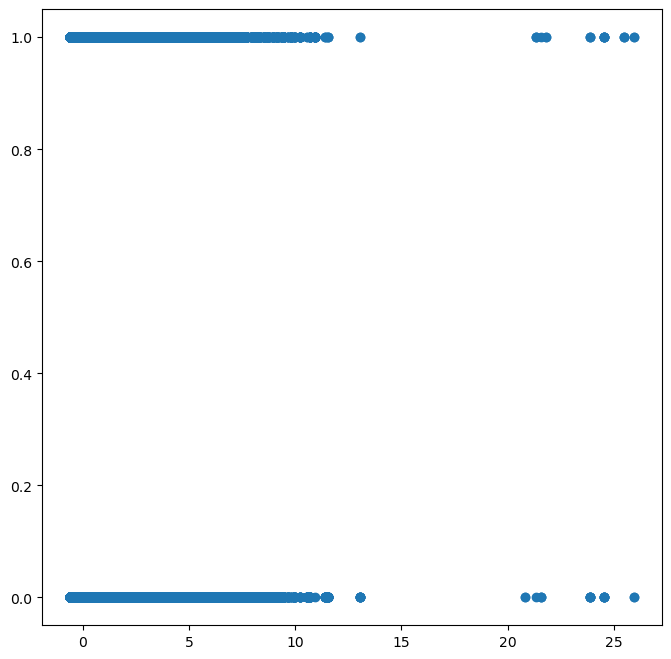

In [61]:
plt.figure(figsize=(8,8))
plt.scatter(X['OPAnnualReimbursementAmt'],Y)

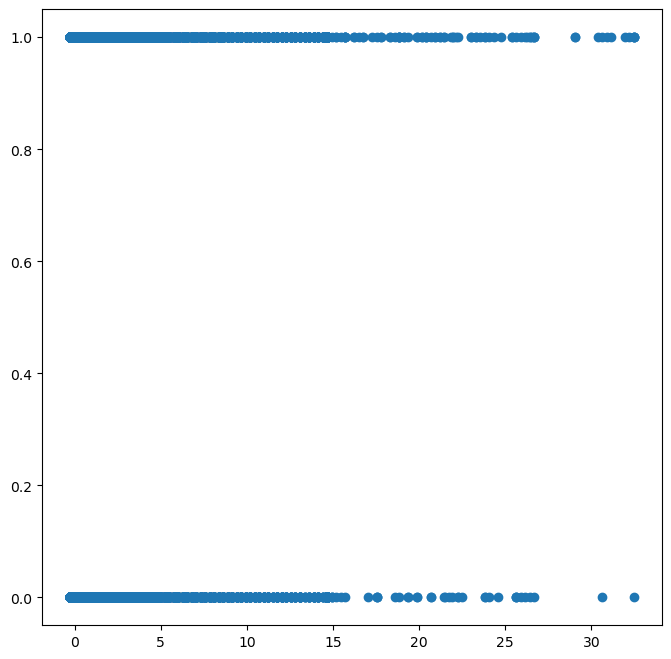

In [62]:
plt.figure(figsize=(8,8))
plt.scatter(X['claim'],Y)


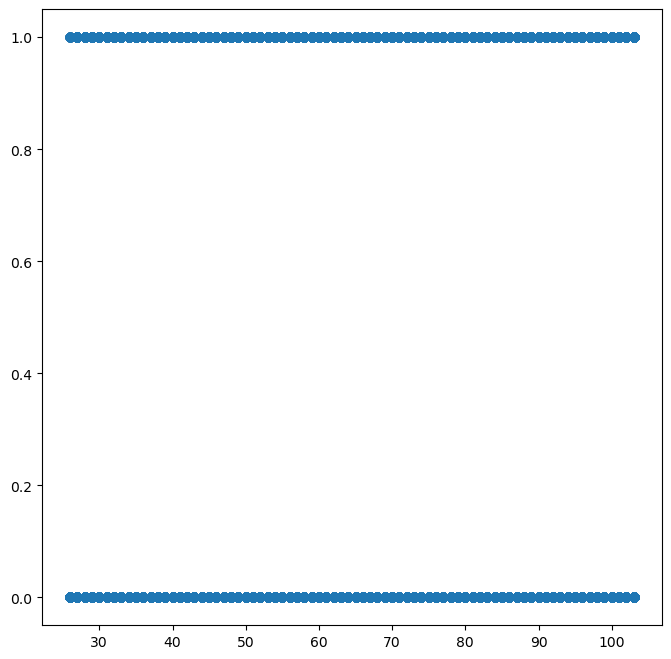

In [63]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],Y)

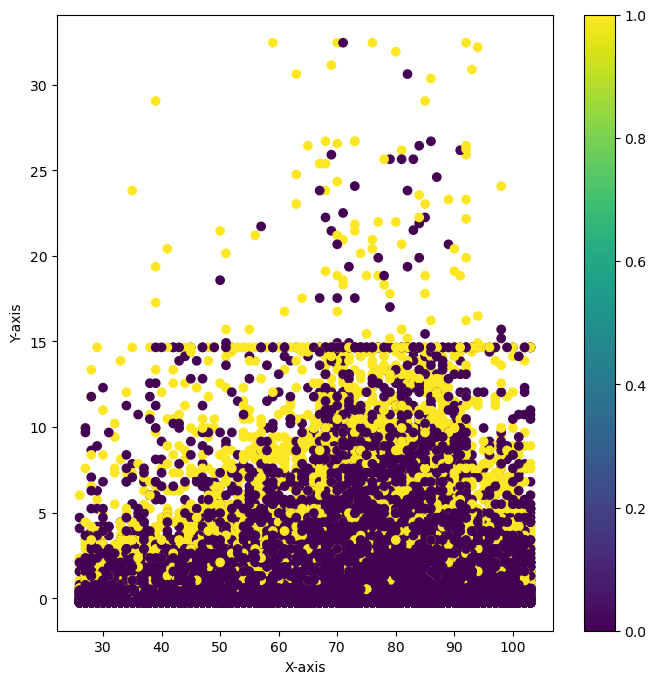

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],X['claim'],c=Y)
    # add a colorbar to the plot
plt.colorbar()

            # set the labels for the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# show the plot
plt.show()

## Feature Selection and applying logistic on it 

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2



scaler = MinMaxScaler()
x = scaler.fit_transform(X)
# perform univariate feature selection using chi-squared test
X_new = SelectKBest(chi2, k=4).fit_transform(x, Y)

# print the selected features
print(X_new.shape)

(542151, 4)


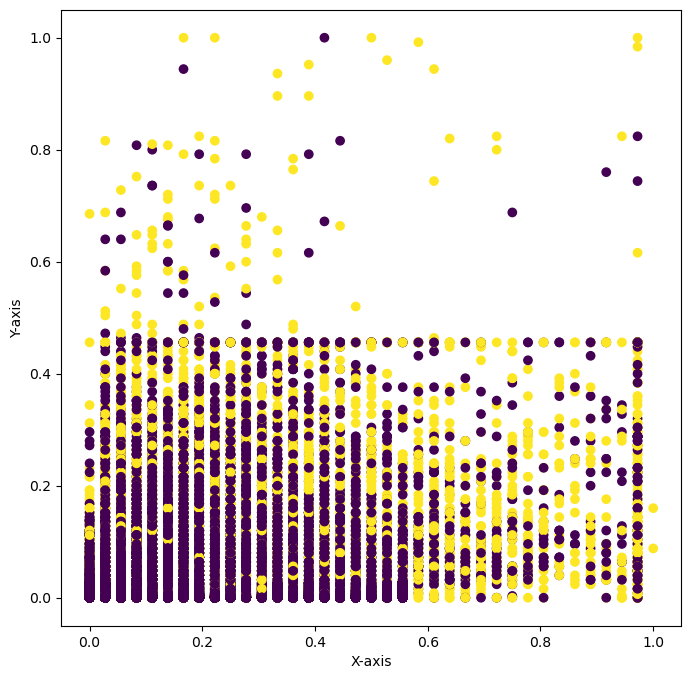

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(X_new[:,2],X_new[:,1],c=Y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.show()

In [67]:
X_new

array([[0.00000000e+00, 2.40000000e-04, 0.00000000e+00, 7.40247735e-01],
       [0.00000000e+00, 3.20000000e-04, 0.00000000e+00, 7.40247735e-01],
       [0.00000000e+00, 1.60000000e-03, 0.00000000e+00, 7.40247735e-01],
       ...,
       [1.00000000e+00, 6.40000000e-02, 2.22222222e-01, 5.19504529e-01],
       [1.00000000e+00, 4.00000000e-02, 8.33333333e-02, 3.42022555e-02],
       [1.00000000e+00, 2.40000000e-02, 2.22222222e-01, 3.72712146e-01]])

In [68]:
Xtr,Xte,Ytr,Yte=train_test_split(X_new,Y, test_size=2/10, train_size=8/10) 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier1 = LogisticRegression().fit(Xtr, Ytr)

In [70]:
yhat1=classifier1.predict(Xte)

In [71]:
print(f'Accuracy Score is {accuracy_score(Yte,yhat1)}')

Accuracy Score is 0.6324667299941898


In [72]:
X= X.reset_index(drop=True)

In [73]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
4,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542146,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
542147,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2
542148,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
542149,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


## Splitting the Data into Training set and testing set

### Applying the Logistic Regression

In [74]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=2/10, train_size=8/10) 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier = LogisticRegression().fit(Xtrain, Ytrain)

In [76]:
yhat=classifier.predict(Xtest)

In [77]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest,yhat)}')  

Accuracy Score is 0.6350213499829385


In [78]:
print(f'Precision Score is {precision_score(Ytest,yhat)}') 

Precision Score is 0.5917630057803468


In [79]:
print(f'Recall Score is {accuracy_score(Ytest,yhat)}') 

Recall Score is 0.6350213499829385


In [80]:
print(f'f1 Score is {f1_score(Ytest,yhat)}') 

f1 Score is 0.17146446142573013


In [81]:
Xtest

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
170021,-0.527643,0.309676,3.611384,1.832508,3,3,0.0,1.0,1,84,1,830,12,12,2,1,2,2,1,2,2,2
272459,-0.370501,-0.368953,-0.286191,-0.258277,20,3,1.0,0.0,0,90,1,2172,12,12,1,1,2,1,2,1,1,2
326847,-0.264881,-0.069558,3.611384,1.309158,5,3,0.0,1.0,0,76,1,921,12,12,2,2,1,2,1,1,1,2
133118,0.855721,-0.249195,-0.286191,-0.234726,0,3,1.0,0.0,0,86,1,2250,12,12,1,2,2,1,1,1,1,2
199821,0.505372,-0.608470,-0.286191,-0.182391,0,3,1.0,0.0,0,75,1,3126,12,12,1,1,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323333,-0.313827,-0.398893,-0.286191,-0.250426,20,3,0.0,1.0,0,69,1,4190,12,12,2,2,2,2,2,2,2,2
2969,1.463680,1.257761,-0.286191,-0.156223,0,3,0.0,1.0,0,77,1,3961,12,12,2,2,2,1,1,1,1,2
483545,-0.033032,0.219857,-0.286191,-0.130056,0,3,0.0,1.0,0,44,1,916,12,12,2,2,2,1,2,1,1,2
340452,-0.079402,0.828627,-0.286191,-0.242576,0,3,0.0,1.0,0,65,1,3316,12,12,2,1,2,2,2,2,2,2


## Importing the tensor flow Model for Neural Networks applications

In [82]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow import keras

### Implementing the Neural Networks


In [83]:
# model = Sequential(
#     [               
#         tf.keras.Input(shape=(22,)),    #specify input size
        
#         Dense(units=256,activation='linear',kernel_regularizer=keras.regularizers.l2(0.0001)),
#         Dense(units=128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)),
#         Dense(units=1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))
        
        
        
#     ], name = "my_model" 
# )

In [84]:
# model.summary()

In [85]:
# Xtrain = tf.constant(np.asarray(Xtrain), dtype=tf.float32)
# Ytrain = tf.constant(np.asarray(Ytrain), dtype=tf.float32)

In [86]:
# model.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(),
#     optimizer=tf.keras.optimizers.Adam(0.001),
# )

# model.fit(Xtrain,Ytrain,epochs=50)

In [87]:
# Xtest = tf.constant(np.asarray(Xtest), dtype=tf.float32)
# Ytest = tf.constant(np.asarray(Ytest), dtype=tf.float32)

In [88]:
# prediction = model.predict(Xtest)

In [89]:
# yhut=[]
# for i in range(len(prediction)):
#     if prediction[i] >= 0.5:
      
#         yhut.append(1)
#     else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
#                                         # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
#         yhut.append(0)


In [90]:
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# print(f'Accuracy Score is {accuracy_score(Ytest,yhut)}') 
# print('Precision: %.3f' % precision_score(Ytest, yhut))
# print('recall: %.3f' % recall_score(Ytest, yhut))
# print('f1 score: %.3f' % f1_score(Ytest, yhut))

### Implementing the XG Boost Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier as XG

In [92]:
modelxg = XG()
modelxg.fit(Xtrain, Ytrain)

GradientBoostingClassifier()

In [93]:
print(modelxg)

GradientBoostingClassifier()


In [94]:
y_pred = modelxg.predict(Xtest)
predictions = [round(value) for value in y_pred]

In [95]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.86%


In [96]:
print('Precision: %.3f' % precision_score(Ytest,predictions))

Precision: 0.812


In [97]:
print('Recall: %.3f' % recall_score(Ytest,predictions))

Recall: 0.536


In [98]:
print('F1: %.3f' % f1_score(Ytest,predictions))

F1: 0.646


### Xg Boost with Hyper parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [111]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [10, 50]
}

In [112]:
model1 = XG()


In [113]:
grid_search = GridSearchCV(estimator=model1, param_grid=params, cv=3, n_jobs=-1)


In [114]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50]})

In [115]:
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Best Score: 0.9487457505385261


In [117]:
model1 = XG(learning_rate= 0.2 , max_depth= 7 , n_estimators= 50)

In [118]:
model1.fit(Xtrain, Ytrain)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50)

In [119]:
y_pred = model1.predict(Xtest)

predictions1 = [round(value) for value in y_pred]

In [120]:
accuracy = accuracy_score(Ytest, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.96%


In [121]:
print('Precision: %.3f' % precision_score(Ytest,predictions1))

Precision: 0.975


In [122]:
print('Recall: %.3f' % recall_score(Ytest,predictions1))

Recall: 0.916


In [123]:
print('F1: %.3f' % f1_score(Ytest,predictions1))

F1: 0.945


In [ ]:
# from xgboost import plot_tree
# import matplotlib.pyplot as plt
# plot_tree(model)
# # plt.figure(figsize=(100,100))
# plt.show()



### Implementing Under Samling for the Data Imbalance Problem

In [124]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
X1,Y1 = undersample.fit_resample(X, Y)
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,Y, test_size=1/10, train_size=9/10) 

In [125]:
model2 = XG( learning_rate=0.1, max_depth=4,n_estimators=5)
model2.fit(Xtrain1, Ytrain1)

GradientBoostingClassifier(max_depth=4, n_estimators=5)

In [126]:
y_pred = model2.predict(Xtest1)

predictions2 = [round(value) for value in y_pred]

In [127]:
accuracy = accuracy_score(Ytest1, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.04%


In [129]:
print('Precision: %.3f' % precision_score(Ytest1,predictions2))

Precision: 0.875


In [130]:
print('F1: %.3f' % f1_score(Ytest1,predictions2))

F1: 0.260


In [131]:
classifier = LogisticRegression().fit(Xtrain1, Ytrain1)

In [132]:
yhat=classifier.predict(Xtest1)

In [133]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest1,yhat)}') 

Accuracy Score is 0.6314003246274162


In [134]:
print(f'Precision Score is {precision_score(Ytest1,yhat)}') 

Precision Score is 0.583021582733813


## Implementing Random Forest 


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [137]:
y_pred = rf.predict(Xtest)

In [138]:
accuracy = accuracy_score(Ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8025564644797152


In [139]:
print(f'Precision Score is {precision_score(Ytest,y_pred)}') 

Precision Score is 0.7907839616995811


In [140]:
print(f'Recall Score is {recall_score(Ytest,y_pred)}') 

Recall Score is 0.6470314603990697


In [141]:
print(f'F1 Score is {f1_score(Ytest,y_pred)}') 

F1 Score is 0.7117215377364842


## Importing the tensor flow Model for Neural Networks applications

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


In [143]:
Xtrain = tf.constant(np.asarray(Xtrain), dtype=tf.float32)
Ytrain = tf.constant(np.asarray(Ytrain), dtype=tf.float32)


In [144]:
model = Sequential(
    [               
        tf.keras.Input(shape=(22,)),    #specify input size
        
        Dense(units=30,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        Dense(units=15,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        Dense(units=1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))
        
        
        
    ], name = "my_model" 
)


In [145]:
model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                690       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)


In [147]:
Xtrain 

<tf.Tensor: shape=(433720, 22), dtype=float32, numpy=
array([[-0.2854895 ,  0.05019986, -0.28619105, ...,  2.        ,
         1.        ,  2.        ],
       [-0.5740122 , -0.64838904,  3.6113834 , ...,  1.        ,
         1.        ,  2.        ],
       [ 0.11895759,  0.14001843, -0.28619105, ...,  1.        ,
         2.        ,  2.        ],
       ...,
       [-0.51476204,  0.4893129 , -0.28619105, ...,  1.        ,
         1.        ,  2.        ],
       [-0.1489564 ,  0.52923226, -0.28619105, ...,  2.        ,
         1.        ,  2.        ],
       [-0.49672937, -0.45877206, -0.28619105, ...,  1.        ,
         1.        ,  2.        ]], dtype=float32)>

In [148]:
model.fit(Xtrain,Ytrain,epochs=4)

Epoch 1/4
13554/13554 [==============================] - 43s 3ms/step - loss: 1.0062
Epoch 2/4
13554/13554 [==============================] - 39s 3ms/step - loss: 0.8516
Epoch 3/4
13554/13554 [==============================] - 39s 3ms/step - loss: 0.7751
Epoch 4/4
13554/13554 [==============================] - 39s 3ms/step - loss: 0.7193


In [149]:
Xtest = tf.constant(np.asarray(Xtest), dtype=tf.float32)
Ytest = tf.constant(np.asarray(Ytest), dtype=tf.float32)

In [150]:
prediction = model.predict(Xtest)

3389/3389 [==============================] - 5s 2ms/step


In [151]:
prediction


array([[0.51490074],
       [0.26055503],
       [0.49295133],
       ...,
       [0.3185638 ],
       [0.15681714],
       [0.190275  ]], dtype=float32)

In [152]:
yhut=[]
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
      
        yhut.append(1)
    else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                        # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
        yhut.append(0)


In [153]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy Score is {accuracy_score(Ytest,yhut)}') 
print('Precision: %.3f' % precision_score(Ytest, yhut))
print('recall: %.3f' % recall_score(Ytest, yhut))
print('f1 score: %.3f' % f1_score(Ytest, yhut))

Accuracy Score is 0.6459960712342411
Precision: 0.640
recall: 0.137
f1 score: 0.226


In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
clf = DecisionTreeClassifier(max_depth=8,criterion="entropy",random_state=42,min_samples_split=3)

In [ ]:
# param_grid = {
#     'max_depth': [2, 4, 6, 8],
#     'min_samples_split': [2, 4, 6, 8],
#     'min_samples_leaf': [1, 2, 4, 8]
# }

In [ ]:
# dt_cv = GridSearchCV(clf, param_grid, cv=2)
# dt_cv.fit(Xtest,Ytest)
# print("Best Hyperparameters: ", dt_cv.best_params_)
# print("Best Score: ", dt_cv.best_score_)

In [157]:
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       random_state=42)

In [158]:
y_pred1 = clf.predict(Xtest)

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy Score is {accuracy_score(Ytest,y_pred1)}') 
print('Precision: %.3f' % precision_score(Ytest, y_pred1))
print('recall: %.3f' % recall_score(Ytest, y_pred1))
print('f1 score: %.3f' % f1_score(Ytest, y_pred1))

Accuracy Score is 0.7590264776678256
Precision: 0.815
recall: 0.466
f1 score: 0.593


In [160]:
y_pred2 = clf.predict(Xtrain)
print(f'Accuracy Score is {accuracy_score(Ytrain,y_pred2)}') 
print('Precision: %.3f' % precision_score(Ytrain, y_pred2))
print('recall: %.3f' % recall_score(Ytrain, y_pred2))
print('f1 score: %.3f' % f1_score(Ytrain, y_pred2))

Accuracy Score is 0.7609840450059947
Precision: 0.820
recall: 0.471
f1 score: 0.598


### Combining all results

In [161]:
models = [classifier,model,clf,modelxg,model1,rf]

accuracy = []
precision = []
recall = []
f1 = []
yhut=[]
# loop through each model
for modeli in models:
    
    
    # make predictions on the test data
    y_pred = modeli.predict(Xtest)
    if(modeli==model):
        
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:

                yhut.append(1)
            else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                            # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
                yhut.append(0)
        y_pred=yhut
    # calculate the metric scores and append them to the corresponding list
    accuracy.append(accuracy_score(Ytest, y_pred))
    precision.append(precision_score(Ytest, y_pred))
    recall.append(recall_score(Ytest, y_pred))
    f1.append(f1_score(Ytest, y_pred))
    print(modeli)

metric_scores = {'Model': ['Logistic Regression','Neural Networks','Decision Tree','Xg Boost','Xg with Hp Tuning', 'Random Forest'],
                 'Accuracy': accuracy,
                 'Precision': precision,
                 'Recall': recall,
                 'F1-Score': f1
                }

# create a Pandas DataFrame from the dictionary
data = pd.DataFrame(metric_scores)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


LogisticRegression()
3389/3389 [==============================] - 5s 1ms/step
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       random_state=42)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


GradientBoostingClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier()


In [162]:
data

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.635003,0.590313,0.101457,0.173154
1,Neural Networks,0.645996,0.640219,0.137495,0.226374
2,Decision Tree,0.759026,0.815388,0.465736,0.592848
3,Xg Boost,0.778633,0.812074,0.536492,0.646125
4,Xg with Hp Tuning,0.959578,0.975335,0.915853,0.944658
5,Random Forest,0.802556,0.790784,0.647031,0.711722
